# Step 0 - Loading the necessary libraries and setting them up

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt

import mpld3
mpld3.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 7)

# Step 1 - Data Collection

In [2]:
A = pd.read_csv('A.csv', parse_dates=True, index_col=0)
A

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000
2015-05-19,18300.480469,18351.359375,18261.349609,18312.390625,18312.390625,87200000
2015-05-20,18315.060547,18350.130859,18272.560547,18285.400391,18285.400391,80190000
2015-05-21,18285.869141,18314.890625,18249.900391,18285.740234,18285.740234,84270000
...,...,...,...,...,...,...
2020-05-08,24107.820313,24349.900391,24107.050781,24331.320313,24331.320313,335760000
2020-05-11,24256.449219,24366.210938,24070.220703,24221.990234,24221.990234,352400000
2020-05-12,24292.839844,24382.089844,23761.580078,23764.779297,23764.779297,359480000


In [3]:
B = pd.read_csv('B.csv', parse_dates=True, index_col=0); 
B

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,2122.070068,2123.889893,2116.810059,2122.729980,2122.729980,3092080000
2015-05-18,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2888190000
2015-05-19,2129.449951,2133.020020,2124.500000,2127.830078,2127.830078,3296030000
2015-05-21,2125.550049,2134.280029,2122.949951,2130.820068,2130.820068,3070460000
2015-05-22,2130.360107,2132.149902,2126.060059,2126.060059,2126.060059,2571860000
...,...,...,...,...,...,...
2020-05-08,2908.830078,2932.159912,2902.879883,2929.800049,2929.800049,4857160000
2020-05-11,2915.459961,2944.250000,2903.439941,2930.189941,2930.189941,4807320000
2020-05-12,2939.500000,2945.820068,2869.590088,2870.120117,2870.120117,5107710000


In [4]:
C = pd.read_csv('C.csv', parse_dates=True, index_col=0); 
C

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,12.460000,13.090000,12.350000,12.380000,12.380000,0
2015-05-18,13.080000,13.220000,NaN,12.730000,12.730000,0
2015-05-19,12.950000,13.130000,12.550000,12.850000,12.850000,0
2015-05-20,12.900000,13.270000,12.620000,12.880000,12.880000,0
2015-05-21,13.030000,13.090000,12.090000,12.110000,12.110000,0
...,...,...,...,...,...,...
2020-05-08,30.139999,30.389999,27.889999,27.980000,27.980000,0
2020-05-11,28.459999,31.459999,26.969999,27.570000,27.570000,0
2020-05-12,28.469999,33.040001,26.000000,33.040001,33.040001,0


# Step 2 - Data wrangling/munging

In [10]:
merged_df = A.join(B, how='outer', lsuffix='_A', sort=True).join(C, how='outer', lsuffix='_B', rsuffix='_C', sort=True)

In [11]:
merged_df

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.729980,2122.729980,3.092080e+09,12.460000,13.090000,12.350000,12.380000,12.380000,0.0
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000.0,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2.888190e+09,13.080000,13.220000,NaN,12.730000,12.730000,0.0
2015-05-19,18300.480469,18351.359375,18261.349609,18312.390625,18312.390625,87200000.0,2129.449951,2133.020020,2124.500000,2127.830078,2127.830078,3.296030e+09,12.950000,13.130000,12.550000,12.850000,12.850000,0.0
2015-05-20,18315.060547,18350.130859,18272.560547,18285.400391,18285.400391,80190000.0,NaN,NaN,NaN,NaN,NaN,NaN,12.900000,13.270000,12.620000,12.880000,12.880000,0.0
2015-05-21,18285.869141,18314.890625,18249.900391,18285.740234,18285.740234,84270000.0,2125.550049,2134.280029,2122.949951,2130.820068,2130.820068,3.070460e+09,13.030000,13.090000,12.090000,12.110000,12.110000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08,24107.820313,24349.900391,24107.050781,24331.320313,24331.320313,335760000.0,2908.830078,2932.159912,2902.879883,2929.800049,2929.800049,4.857160e+09,30.139999,30.389999,27.889999,27.980000,27.980000,0.0
2020-05-11,24256.449219,24366.210938,24070.220703,24221.990234,24221.990234,352400000.0,2915.459961,2944.250000,2903.439941,2930.189941,2930.189941,4.807320e+09,28.459999,31.459999,26.969999,27.570000,27.570000,0.0
2020-05-12,24292.839844,24382.089844,23761.580078,23764.779297,23764.779297,359480000.0,2939.500000,2945.820068,2869.590088,2870.120117,2870.120117,5.107710e+09,28.469999,33.040001,26.000000,33.040001,33.040001,0.0


# Step 3 - Data cleaning

In [12]:
merged_df[merged_df.isnull().all(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,


In [13]:
merged_df[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

148

In [14]:
valid_close_df = merged_df.dropna(subset=['Close_A', 'Close_B', 'Close_C'], how='any')

In [15]:
valid_close_df[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

0

In [16]:
valid_close_df

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.729980,2122.729980,3.092080e+09,12.460000,13.090000,12.350000,12.380000,12.380000,0.0
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000.0,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2.888190e+09,13.080000,13.220000,NaN,12.730000,12.730000,0.0
2015-05-19,18300.480469,18351.359375,18261.349609,18312.390625,18312.390625,87200000.0,2129.449951,2133.020020,2124.500000,2127.830078,2127.830078,3.296030e+09,12.950000,13.130000,12.550000,12.850000,12.850000,0.0
2015-05-21,18285.869141,18314.890625,18249.900391,18285.740234,18285.740234,84270000.0,2125.550049,2134.280029,2122.949951,2130.820068,2130.820068,3.070460e+09,13.030000,13.090000,12.090000,12.110000,12.110000,0.0
2015-05-22,18286.869141,18286.869141,18217.140625,18232.019531,18232.019531,78890000.0,2130.360107,2132.149902,2126.060059,2126.060059,2126.060059,2.571860e+09,12.370000,12.370000,11.820000,12.130000,12.130000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08,24107.820313,24349.900391,24107.050781,24331.320313,24331.320313,335760000.0,2908.830078,2932.159912,2902.879883,2929.800049,2929.800049,4.857160e+09,30.139999,30.389999,27.889999,27.980000,27.980000,0.0
2020-05-11,24256.449219,24366.210938,24070.220703,24221.990234,24221.990234,352400000.0,2915.459961,2944.250000,2903.439941,2930.189941,2930.189941,4.807320e+09,28.459999,31.459999,26.969999,27.570000,27.570000,0.0
2020-05-12,24292.839844,24382.089844,23761.580078,23764.779297,23764.779297,359480000.0,2939.500000,2945.820068,2869.590088,2870.120117,2870.120117,5.107710e+09,28.469999,33.040001,26.000000,33.040001,33.040001,0.0


In [17]:
valid_close_df.isnull().any(axis=1).sum()

165

In [18]:
valid_close_df[valid_close_df.isnull().any(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000.0,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2.888190e+09,13.080000,13.220000,NaN,12.730000,12.730000,0.0
2015-06-08,17849.460938,17852.349609,17760.609375,17766.550781,17766.550781,86300000.0,NaN,2093.010010,2079.110107,2079.280029,2079.280029,2.917150e+09,14.840000,15.500000,14.670000,15.290000,15.290000,0.0
2015-06-12,18035.830078,18035.830078,17857.070313,17898.839844,17898.839844,83760000.0,2107.429932,2107.429932,2091.330078,2094.110107,2094.110107,2.719400e+09,13.310000,14.020000,NaN,13.780000,13.780000,0.0
2015-06-19,18116.240234,18117.710938,18010.580078,18015.949219,18015.949219,258300000.0,NaN,2121.639893,2109.449951,2109.989990,2109.989990,4.449810e+09,13.350000,14.000000,12.960000,13.960000,13.960000,0.0
2015-06-24,18139.099609,18139.099609,17966.070313,17966.070313,17966.070313,104980000.0,2123.649902,2125.100098,2108.580078,2108.580078,2108.580078,3.102480e+09,12.570000,13.330000,NaN,13.260000,13.260000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,20188.689453,20489.330078,18917.460938,19898.919922,NaN,871360000.0,2436.500000,2453.570068,2280.520020,2398.100098,2398.100098,8.755780e+09,69.370003,85.470001,69.370003,76.449997,76.449997,0.0
2020-04-02,20819.460938,21477.769531,20735.019531,21413.439453,21413.439453,529540000.0,2458.540039,2533.219971,2455.790039,2526.899902,2526.899902,6.454990e+09,54.459999,57.240002,NaN,50.910000,50.910000,0.0
2020-04-20,24095.099609,24108.689453,NaN,23650.439453,23650.439453,423410000.0,2845.620117,2868.979980,2820.429932,2823.159912,2823.159912,5.220160e+09,40.680000,43.830002,39.880001,43.830002,43.830002,0.0


In [19]:
valid_close_complete = valid_close_df.fillna(method='backfill')

In [20]:
valid_close_complete.isnull().any(axis=1).sum()

0

# Step 4 - Obtaining Descriptive Statistics

In [21]:
pd.set_option('display.max_rows', None)
valid_close_complete.describe()

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.0
mean,22291.125036,22402.395046,22168.922744,22292.881128,22292.531416,2.614436e+08,2517.857235,2529.804546,2504.360406,2518.053995,2518.053995,3.746609e+09,14.628353,17.614230,16.655851,16.417606,16.417606,0.0
std,3771.056417,3784.558787,3755.740756,3769.395516,3767.906829,1.537677e+08,374.081451,375.376401,373.086693,374.314671,374.314671,9.013618e+08,29.023906,9.056045,20.123487,8.016538,8.016538,0.0
min,15676.259766,15897.820313,15370.330078,15660.179688,15660.179688,4.589000e+07,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09,-400.000000,9.310000,8.560000,9.140000,9.140000,0.0
25%,18232.280274,18285.384766,18156.614258,18230.160156,18227.615235,1.233350e+08,2144.320069,2152.525024,2134.464966,2142.250000,2142.250000,3.247990e+09,12.405000,12.900000,11.875000,12.300000,12.300000,0.0
50%,22762.029297,22872.890625,22634.449219,22773.669922,22773.669922,2.631800e+08,2521.199951,2551.820068,2503.189941,2531.939941,2531.939941,3.560770e+09,14.190000,15.010000,13.470000,14.090000,14.090000,0.0
75%,25516.320312,25659.810547,25382.705078,25518.895508,25518.895508,3.328450e+08,2815.010010,2831.880004,2800.239991,2817.330078,2817.330078,3.967360e+09,17.685001,19.040001,16.809999,17.665000,17.665000,0.0
max,29440.470703,29568.570313,29406.750000,29551.419922,29551.419922,2.190810e+09,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09,82.690002,85.470001,330.000000,82.690002,82.690002,0.0


In [22]:
pd.set_option('display.max_rows', 2)

In [23]:
prices_only = valid_close_complete.drop(['Volume_A', 'Volume_B', 'Volume_C'], axis=1)

In [24]:
prices_only

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Open_C,High_C,Low_C,Close_C,Adj Close_C
Date,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,12.46,13.090000,12.350000,12.380000,12.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,35.16,39.279999,32.330002,32.610001,32.610001


# Step 5 - Visual Inspection of the Data

<AxesSubplot:xlabel='Date'>

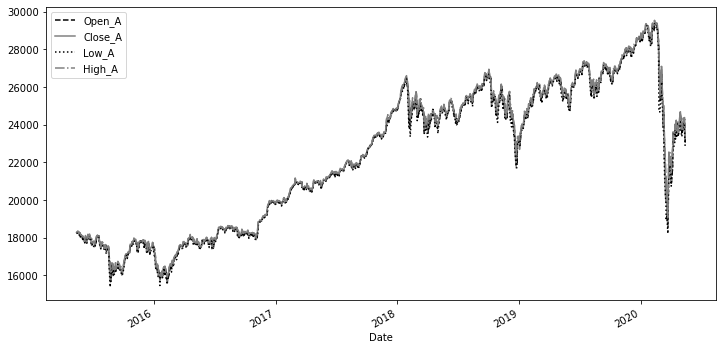

In [25]:
valid_close_complete['Open_A'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_A')
valid_close_complete['Close_A'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_A')
valid_close_complete['Low_A'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_A')
valid_close_complete['High_A'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_A')

<AxesSubplot:xlabel='Date'>

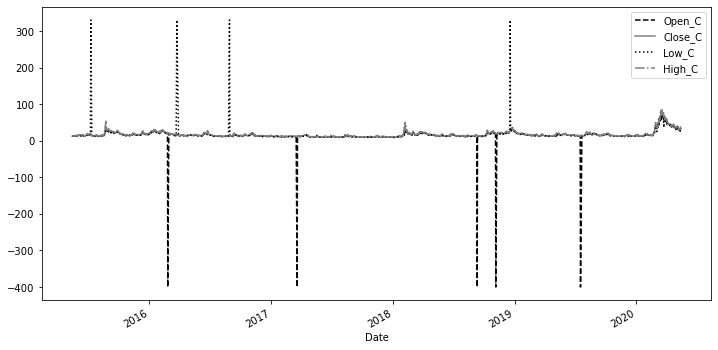

In [26]:
valid_close_complete['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
valid_close_complete['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
valid_close_complete['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
valid_close_complete['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

# Step 6 - Data Cleaning

In [27]:
no_outlier_prices = prices_only[(np.abs(stats.zscore(prices_only)) < 6).all(axis=1)]

<AxesSubplot:xlabel='Date'>

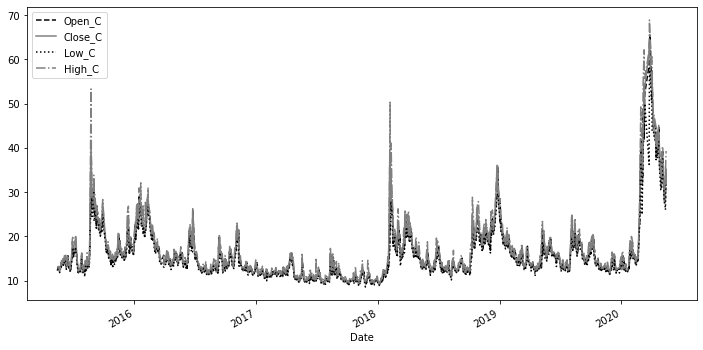

In [28]:
no_outlier_prices['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
no_outlier_prices['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
no_outlier_prices['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
no_outlier_prices['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

In [29]:
pd.set_option('display.max_rows', None)
no_outlier_prices[['Open_C', 'Close_C', 'Low_C', 'High_C']].describe()

,Open_C,Close_C,Low_C,High_C
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,16.147571,16.072648,15.223635,17.214539
std,6.764147,6.773569,5.995822,7.588690
min,9.010000,9.140000,8.560000,9.310000
25%,12.420000,12.285000,11.865000,12.890000
50%,14.160000,14.060000,13.440000,14.940000
75%,17.625000,17.500000,16.550000,18.929999
max,65.669998,63.950001,58.029999,68.860001


In [30]:
pd.set_option('display.max_rows', 5)

# Step 7 - Advanced Visualization Techniques

In [31]:
close_prices = no_outlier_prices[['Close_A', 'Close_B', 'Close_C']]

In [32]:
delta_close_prices = (close_prices.shift(-1) - close_prices).fillna(0)
delta_close_prices.columns = ['Delta_Close_A', 'Delta_Close_B', 'Delta_Close_C']

In [33]:
delta_close_prices

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Date,,,
2015-05-15,26.320312,6.469971,0.350000
2015-05-18,13.509766,-1.369873,0.120000
...,...,...,...
2020-05-13,377.369141,32.500000,-2.669998
2020-05-14,0.000000,0.000000,0.000000


In [34]:
pd.set_option('display.max_rows', None)

In [35]:
delta_close_prices.describe()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
count,1095.000000,1095.000000,1095.000000
mean,4.888383,0.666457,0.018475
std,268.137091,29.218995,1.938761
min,-2848.310547,-294.049805,-9.120001
25%,-70.894532,-7.140076,-0.760000
50%,15.539063,1.770020,-0.080000
75%,113.290039,12.255005,0.540001
max,1351.619141,154.510009,20.010001


<AxesSubplot:ylabel='Frequency'>

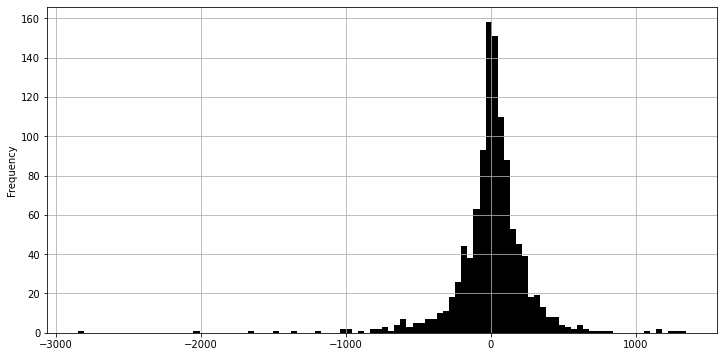

In [36]:
delta_close_prices['Delta_Close_A'].plot(kind='hist', bins=100, figsize=(12,6), color='black', grid=True)

<AxesSubplot:>

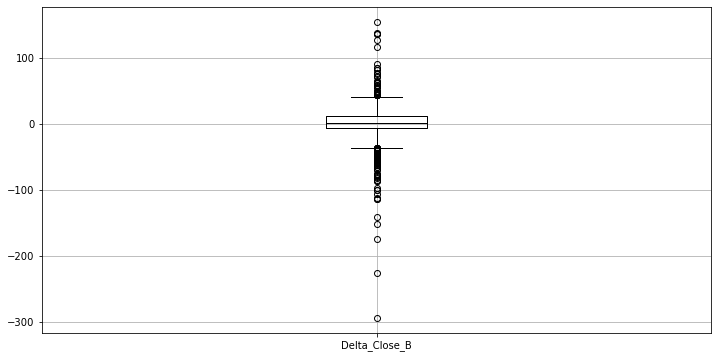

In [37]:
delta_close_prices['Delta_Close_B'].plot(kind='box', figsize=(12,6), color='black', grid=True)

array([[<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_A'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_A'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_A'>],
       [<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_B'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_B'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_B'>],
       [<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_C'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_C'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_C'>]],
      dtype=object)

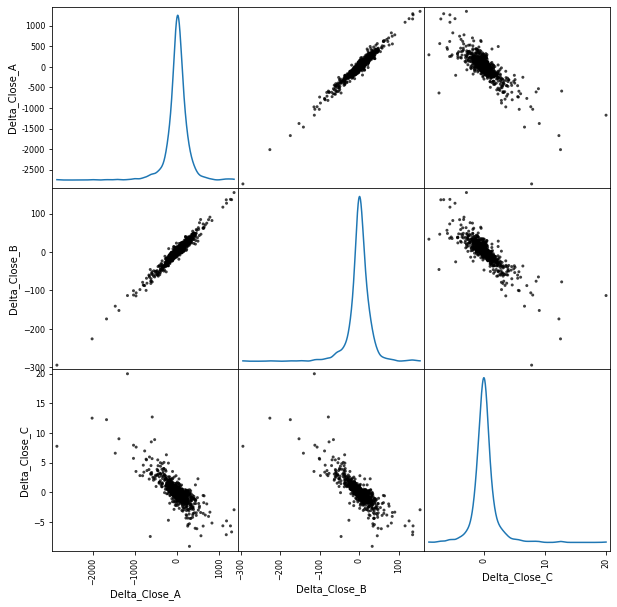

In [38]:
pd.plotting.scatter_matrix(delta_close_prices, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)

In [39]:
delta_close_prices.corr()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Delta_Close_A,1.000000,0.976104,-0.785566
Delta_Close_B,0.976104,1.000000,-0.817788
Delta_Close_C,-0.785566,-0.817788,1.000000


<AxesSubplot:>

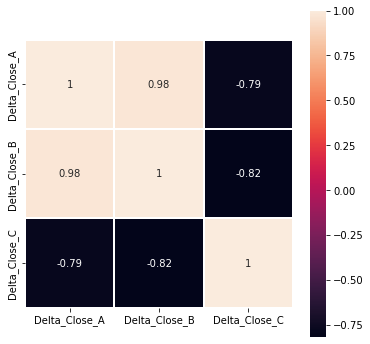

In [40]:
plt.figure(figsize=(6,6))
sn.heatmap(delta_close_prices.corr(), annot=True, square=True, linewidths=2)

# Special Python Libraries for EDA

In [42]:
import dtale
dtale.show(valid_close_df, ignore_duplicate=True)